In [2]:
# open figures and show bipartite_network.png
from PIL import Image
img = Image.open('../figures/bipartite_network.png')
img.show()

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/juanma/snap/code/common/.cache/gio-modules/libgiolibproxy.so
eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


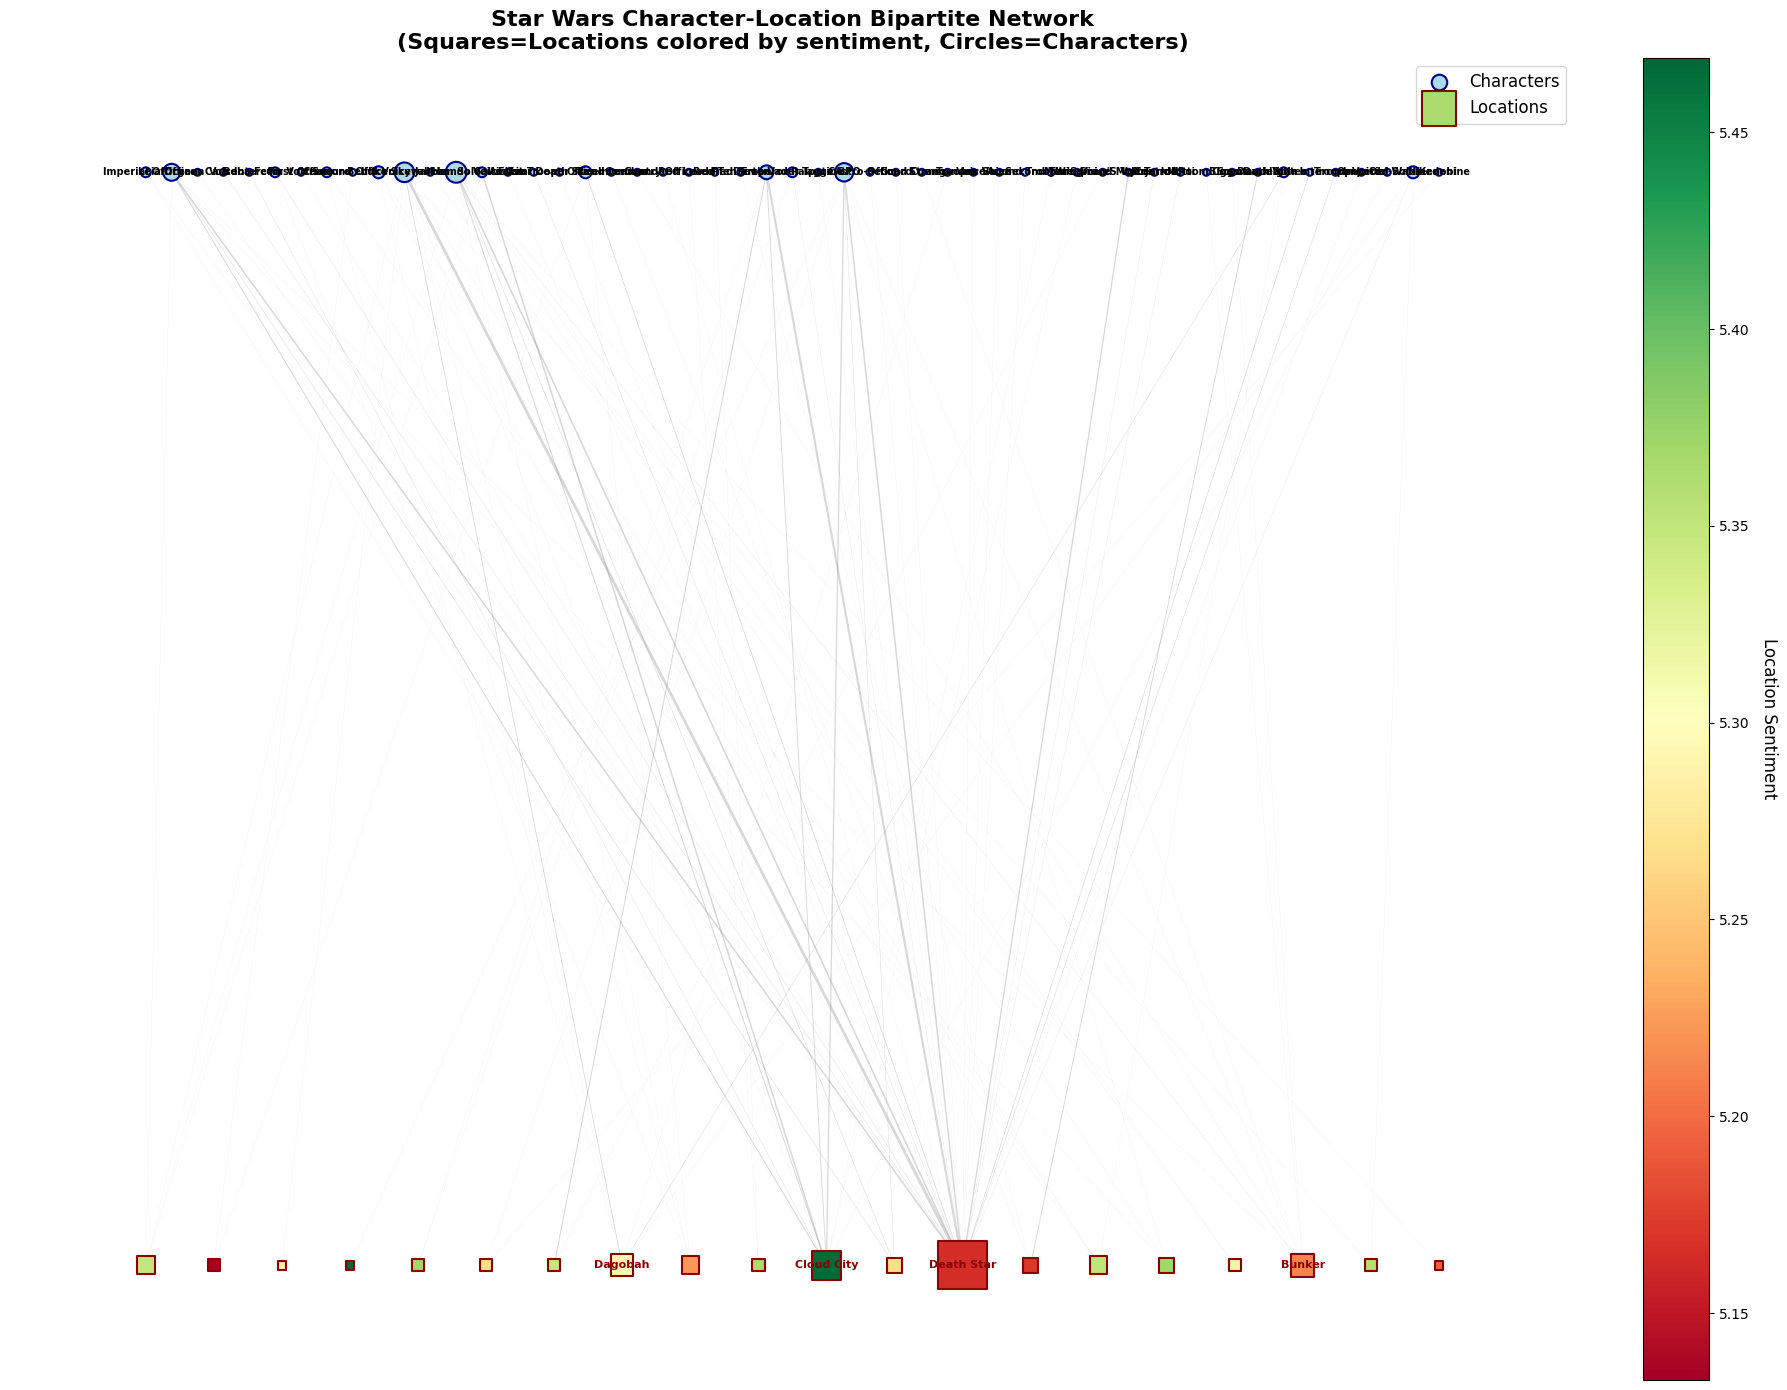

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
import numpy as np

# read location_characters_dict from json location_characters_sentiment.json
import json
with open('../data/location_characters_with_sentiment.json', 'r') as f:
    location_characters_dict = json.load(f) 



# only the first 10 locations for simplicity
location_characters_dict = dict(list(location_characters_dict.items())[:20])
# Create bipartite graph
G_bipartite = nx.Graph()

# Add nodes and edges
for location, data in location_characters_dict.items():
    G_bipartite.add_node(location, bipartite=0, sentiment=data['sentiment'], node_type='location')
    
    for char, count in data['characters'].items():
        if char not in G_bipartite:
            G_bipartite.add_node(char, bipartite=1, node_type='character')
        G_bipartite.add_edge(location, char, weight=count)

# Separate nodes by type
char_nodes = [node for node, d in G_bipartite.nodes(data=True) if d['node_type'] == 'character']
loc_nodes = [node for node, d in G_bipartite.nodes(data=True) if d['node_type'] == 'location']

# Calculate degrees for filtering
location_degrees = {loc: G_bipartite.degree(loc) for loc in loc_nodes}

# Get sentiments and calculate min/max
sentiments = [G_bipartite.nodes[node]['sentiment'] for node in loc_nodes if G_bipartite.nodes[node]['sentiment'] is not None]
min_sentiment = min(sentiments) if sentiments else 1.0
max_sentiment = max(sentiments) if sentiments else 10.0

# Get sentiments for location nodes (use mid value for None)
sentiments_for_colors = [G_bipartite.nodes[node]['sentiment'] if G_bipartite.nodes[node]['sentiment'] is not None else (min_sentiment + max_sentiment) / 2 for node in loc_nodes]

# Create figure
fig, ax = plt.subplots(figsize=(18, 14))

# Use bipartite layout
pos_bipartite = nx.bipartite_layout(G_bipartite, loc_nodes, align='horizontal')

# Node sizes
char_node_sizes = [G_bipartite.degree(node) * 25 for node in char_nodes]
loc_node_sizes = [G_bipartite.degree(node) * 40 for node in loc_nodes]

# Draw character nodes (circles)
nx.draw_networkx_nodes(
    G_bipartite,
    pos_bipartite,
    nodelist=char_nodes,
    node_size=char_node_sizes,
    node_color="lightblue",
    edgecolors="darkblue",
    linewidths=1.5,
    label="Characters",
    ax=ax,
)

# Draw location nodes (squares) with sentiment-based colors
nx.draw_networkx_nodes(
    G_bipartite,
    pos_bipartite,
    nodelist=loc_nodes,
    node_size=loc_node_sizes,
    node_shape='s',
    node_color=sentiments_for_colors,
    cmap='RdYlGn',
    vmin=min_sentiment,
    vmax=max_sentiment,
    edgecolors="darkred",
    linewidths=1.5,
    label="Locations",
    ax=ax,
)

# Draw edges
edges_bi = G_bipartite.edges()
weights_bi = [G_bipartite[u][v]["weight"] for u, v in edges_bi]
max_weight_bi = max(weights_bi) if weights_bi else 1
edge_widths_bi = [w / max_weight_bi * 2 for w in weights_bi]

nx.draw_networkx_edges(
    G_bipartite,
    pos_bipartite,
    width=edge_widths_bi,
    alpha=0.3,
    edge_color="gray",
    ax=ax,
)

# Draw all character labels
nx.draw_networkx_labels(
    G_bipartite,
    pos_bipartite,
    labels={node: node if node in char_nodes else "" for node in G_bipartite.nodes()},
    font_size=7,
    font_weight="bold",
    ax=ax,
)

# Draw location labels for highly connected locations only
high_degree_locs = {loc: loc for loc, deg in location_degrees.items() if deg >= 5}
nx.draw_networkx_labels(
    G_bipartite,
    pos_bipartite,
    labels=high_degree_locs,
    font_size=8,
    font_color="darkred",
    font_weight="bold",
    ax=ax,
)

# Add colorbar for sentiment
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=min_sentiment, vmax=max_sentiment))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Location Sentiment', rotation=270, labelpad=20, fontsize=12)

ax.set_title(
    "Star Wars Character-Location Bipartite Network\n(Squares=Locations colored by sentiment, Circles=Characters)",
    fontsize=16,
    fontweight="bold",
)
ax.legend(scatterpoints=1, fontsize=12)
ax.axis("off")
plt.tight_layout()
plt.show()

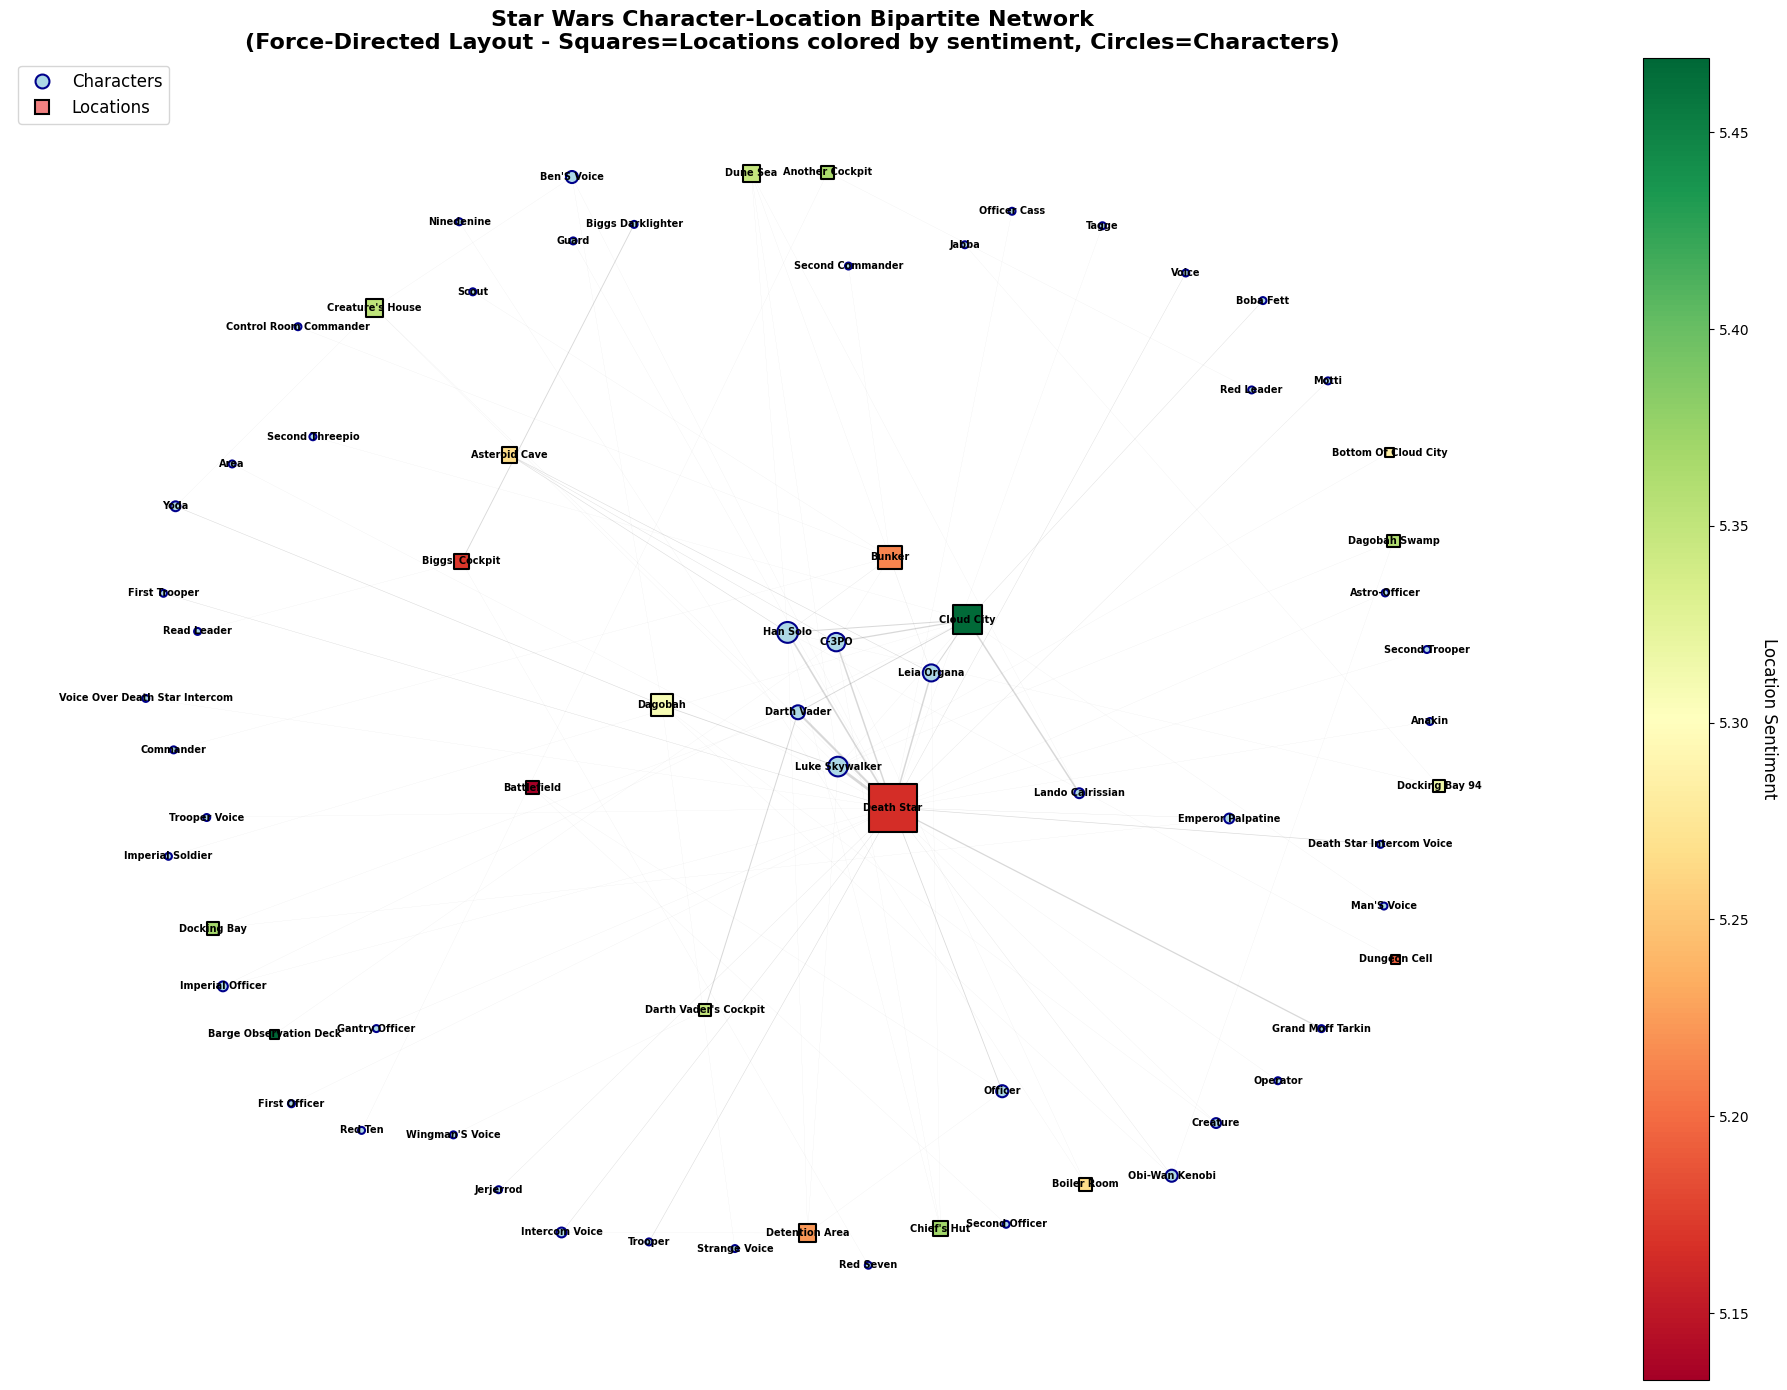

In [4]:
# Create bipartite graph
G_bipartite = nx.Graph()

# Add nodes and edges
for location, data in location_characters_dict.items():
    G_bipartite.add_node(location, bipartite=0, sentiment=data['sentiment'], node_type='location')
    
    for char, count in data['characters'].items():
        if char not in G_bipartite:
            G_bipartite.add_node(char, bipartite=1, node_type='character')
        G_bipartite.add_edge(location, char, weight=count)

# Separate nodes by type
char_nodes = [node for node, d in G_bipartite.nodes(data=True) if d['node_type'] == 'character']
loc_nodes = [node for node, d in G_bipartite.nodes(data=True) if d['node_type'] == 'location']

# Calculate degrees for filtering
location_degrees = {loc: G_bipartite.degree(loc) for loc in loc_nodes}

# Get sentiments and calculate min/max
sentiments = [G_bipartite.nodes[node]['sentiment'] for node in loc_nodes if G_bipartite.nodes[node]['sentiment'] is not None]
min_sentiment = min(sentiments) if sentiments else 1.0
max_sentiment = max(sentiments) if sentiments else 10.0

# Get sentiments for location nodes (use mid value for None)
sentiments_for_colors = [G_bipartite.nodes[node]['sentiment'] if G_bipartite.nodes[node]['sentiment'] is not None else (min_sentiment + max_sentiment) / 2 for node in loc_nodes]

# Create figure
fig, ax = plt.subplots(figsize=(18, 14))

# Use spring layout for bipartite network
pos_bipartite = nx.spring_layout(
    G_bipartite, k=1.5, iterations=50, seed=42, weight="weight"
)

# Node sizes
char_node_sizes = [G_bipartite.degree(node) * 25 for node in char_nodes]
loc_node_sizes = [G_bipartite.degree(node) * 40 for node in loc_nodes]

# Draw character nodes (circles)
nx.draw_networkx_nodes(
    G_bipartite,
    pos_bipartite,
    nodelist=char_nodes,
    node_size=char_node_sizes,
    node_color="lightblue",
    edgecolors="darkblue",
    linewidths=1.5,
    ax=ax,
)

# Draw location nodes (squares) with sentiment-based colors
nx.draw_networkx_nodes(
    G_bipartite,
    pos_bipartite,
    nodelist=loc_nodes,
    node_size=loc_node_sizes,
    node_shape='s',
    node_color=sentiments_for_colors,
    cmap='RdYlGn',
    vmin=min_sentiment,
    vmax=max_sentiment,
    edgecolors="black",
    linewidths=1.5,
    ax=ax,
)

# Draw edges
edges_bi = G_bipartite.edges()
weights_bi = [G_bipartite[u][v]["weight"] for u, v in edges_bi]
max_weight_bi = max(weights_bi) if weights_bi else 1
edge_widths_bi = [w / max_weight_bi * 2 for w in weights_bi]

nx.draw_networkx_edges(
    G_bipartite,
    pos_bipartite,
    width=edge_widths_bi,
    alpha=0.3,
    edge_color="gray",
    ax=ax,
)

# Draw all character labels
nx.draw_networkx_labels(
    G_bipartite,
    pos_bipartite,
    labels={node: node if node in char_nodes else "" for node in G_bipartite.nodes()},
    font_size=7,
    font_weight="bold",
    ax=ax,
)

# Draw ALL location labels with same font size
nx.draw_networkx_labels(
    G_bipartite,
    pos_bipartite,
    labels={node: node if node in loc_nodes else "" for node in G_bipartite.nodes()},
    font_size=7,
    font_color="black",
    font_weight="bold",
    ax=ax,
)

# Add colorbar for sentiment
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=min_sentiment, vmax=max_sentiment))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Location Sentiment', rotation=270, labelpad=20, fontsize=12)

# Create custom legend to avoid overlap
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Characters',
           markerfacecolor='lightblue', markeredgecolor='darkblue', 
           markersize=10, markeredgewidth=1.5),
    Line2D([0], [0], marker='s', color='w', label='Locations',
           markerfacecolor='lightcoral', markeredgecolor='black', 
           markersize=10, markeredgewidth=1.5)
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=12)

ax.set_title(
    "Star Wars Character-Location Bipartite Network\n(Force-Directed Layout - Squares=Locations colored by sentiment, Circles=Characters)",
    fontsize=16,
    fontweight="bold",
)
ax.axis("off")
plt.tight_layout()
plt.show()

plot description: Bipartite graph representing characters and locations where more dense edges relate to a larger weight of the bond meaning more appearences of the character in the specific location.
Characters = circle
Locations = Square
Location sentiment is calculated based on the scene descriptions + the dialogues taking place there
Location node colors are based on the computed sentiment analysis
Characters do not have any colors 

In [ ]:
# Get first 20 locations
location_characters_dict_subset = dict(list(location_characters_dict.items())[:20])

# Create bipartite graph with subset
G_bipartite_subset = nx.Graph()

# Add nodes and edges for subset
for location, data in location_characters_dict_subset.items():
    G_bipartite_subset.add_node(location, bipartite=0, sentiment=data['sentiment'], node_type='location')
    
    for char, count in data['characters'].items():
        if char not in G_bipartite_subset:
            G_bipartite_subset.add_node(char, bipartite=1, node_type='character')
        G_bipartite_subset.add_edge(location, char, weight=count)

# Separate nodes by type
char_nodes_subset = [node for node, d in G_bipartite_subset.nodes(data=True) if d['node_type'] == 'character']
loc_nodes_subset = [node for node, d in G_bipartite_subset.nodes(data=True) if d['node_type'] == 'location']

# Project location sentiments onto characters
character_sentiments_subset = {}

for char in char_nodes_subset:
    connected_locations = [n for n in G_bipartite_subset.neighbors(char) if n in loc_nodes_subset]
    
    if not connected_locations:
        character_sentiments_subset[char] = None
        continue
    
    weighted_sum = 0
    total_weight = 0
    
    for loc in connected_locations:
        weight = G_bipartite_subset[char][loc]['weight']
        sentiment = G_bipartite_subset.nodes[loc]['sentiment']
        
        if sentiment is not None:
            weighted_sum += sentiment * weight
            total_weight += weight
    
    if total_weight > 0:
        character_sentiments_subset[char] = weighted_sum / total_weight
    else:
        character_sentiments_subset[char] = None

# Add sentiment attribute to character nodes
for char in char_nodes_subset:
    G_bipartite_subset.nodes[char]['sentiment'] = character_sentiments_subset[char]

# Get sentiments for visualization
loc_sentiments = [G_bipartite_subset.nodes[node]['sentiment'] for node in loc_nodes_subset if G_bipartite_subset.nodes[node]['sentiment'] is not None]
char_sentiments_values = [character_sentiments_subset[node] for node in char_nodes_subset if character_sentiments_subset[node] is not None]

all_sentiments = loc_sentiments + char_sentiments_values
min_sentiment = min(all_sentiments) if all_sentiments else 1.0
max_sentiment = max(all_sentiments) if all_sentiments else 10.0

# Get sentiments for coloring
loc_sentiments_for_colors = [G_bipartite_subset.nodes[node]['sentiment'] if G_bipartite_subset.nodes[node]['sentiment'] is not None else (min_sentiment + max_sentiment) / 2 for node in loc_nodes_subset]
char_sentiments_for_colors = [character_sentiments_subset[node] if character_sentiments_subset[node] is not None else (min_sentiment + max_sentiment) / 2 for node in char_nodes_subset]



Projected sentiments for 51 characters


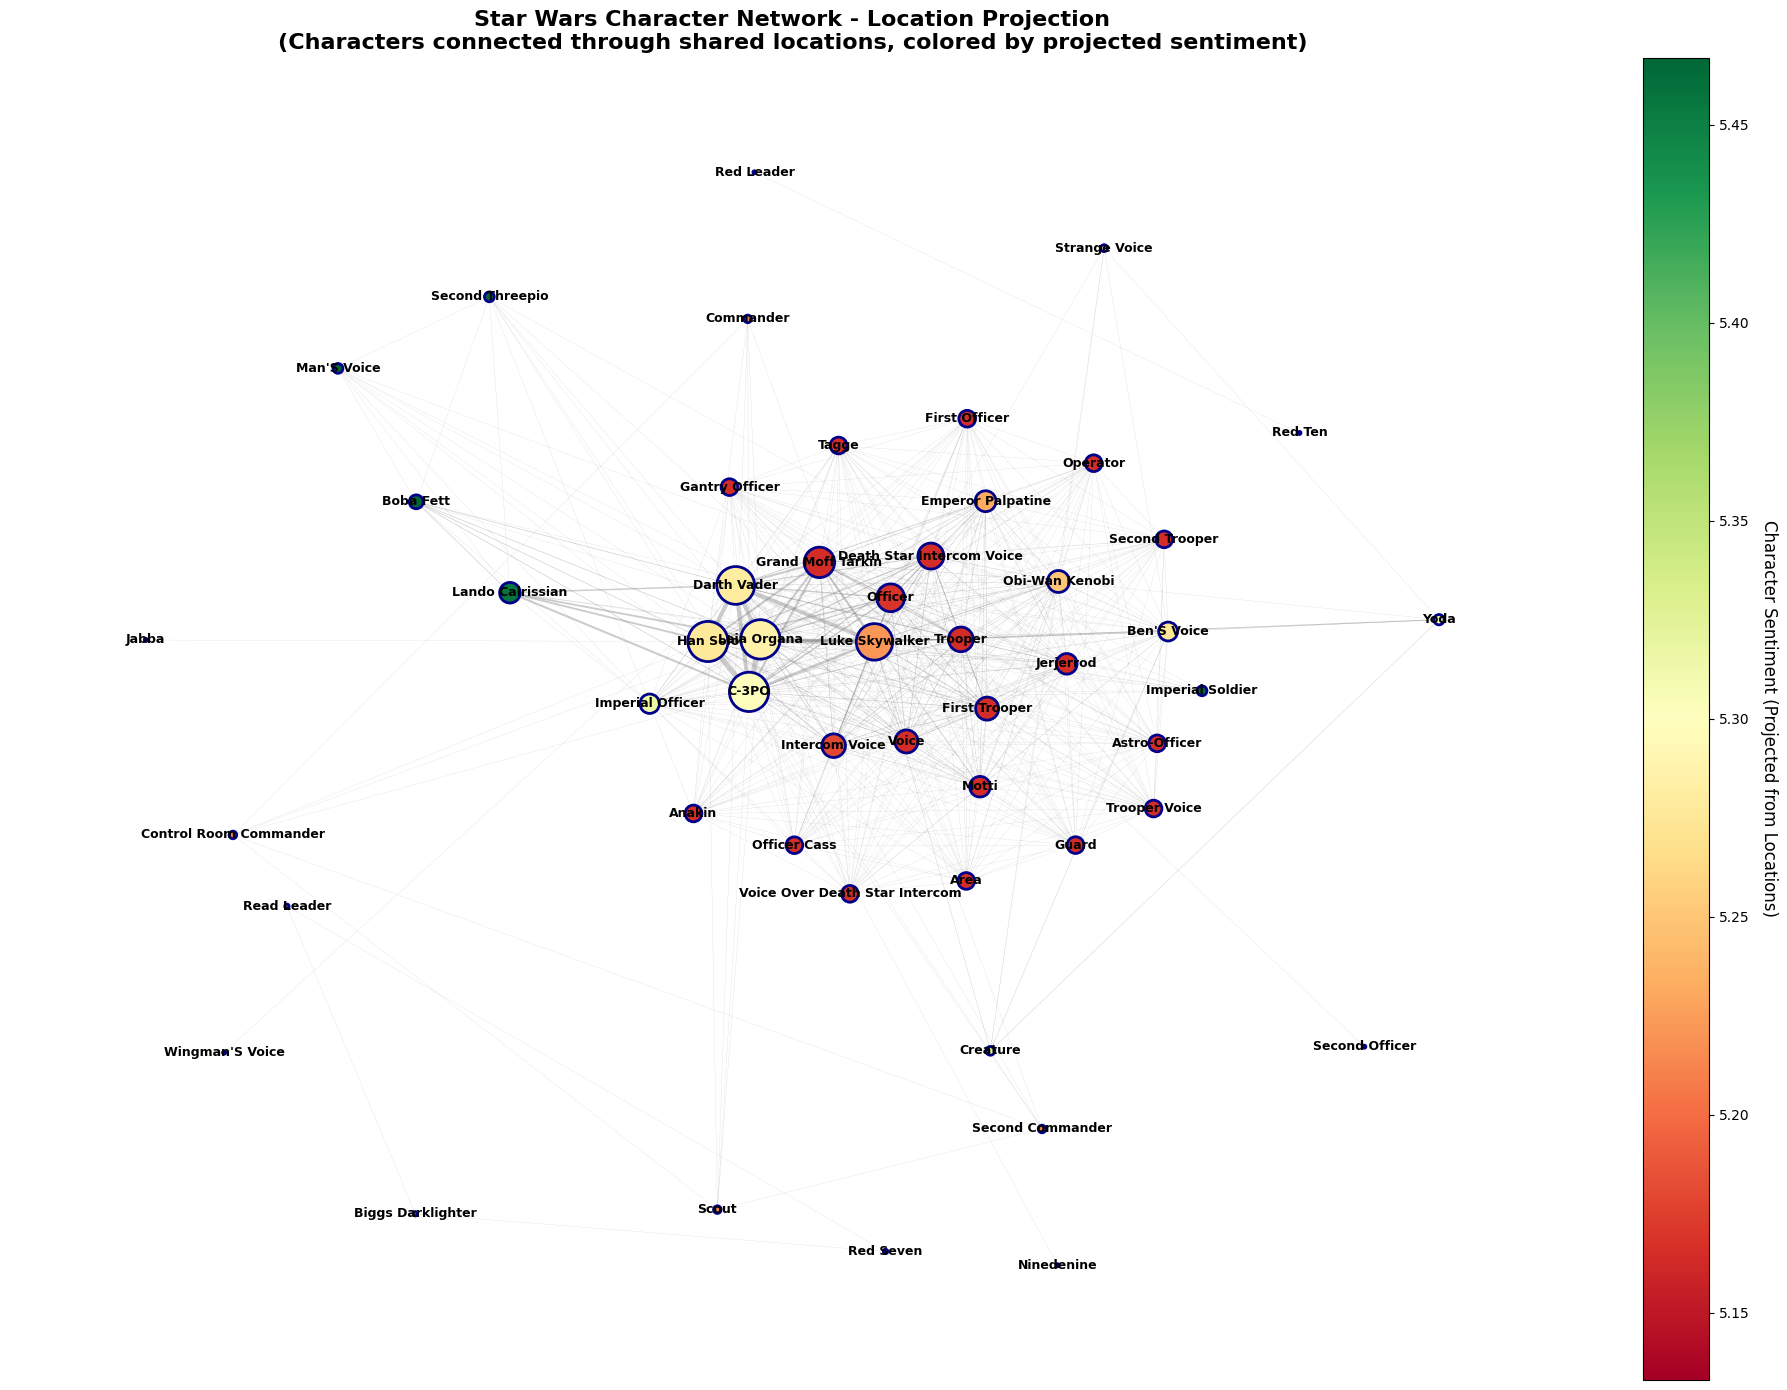


Projection Graph Statistics:
Number of characters: 51
Number of connections: 513
Min sentiment: 5.133, Max sentiment: 5.467


In [8]:
# Create character-to-character projection graph
G_projection = nx.Graph()

# Add all character nodes with projected sentiments
for char in char_nodes_subset:
    G_projection.add_node(char, sentiment=character_sentiments_subset[char])

# For each location, connect all pairs of characters that appear in it
for location in loc_nodes_subset:
    # Get all characters connected to this location
    chars_in_location = [n for n in G_bipartite_subset.neighbors(location) if n in char_nodes_subset]
    
    # Connect all pairs of characters
    for i in range(len(chars_in_location)):
        for j in range(i + 1, len(chars_in_location)):
            char1 = chars_in_location[i]
            char2 = chars_in_location[j]
            
            # Get weights (how many times each character appears in this location)
            weight1 = G_bipartite_subset[char1][location]['weight']
            weight2 = G_bipartite_subset[char2][location]['weight']
            
            # Edge weight is the minimum of the two (conservative estimate of co-occurrence)
            edge_weight = min(weight1, weight2)
            
            # If edge already exists, add to its weight
            if G_projection.has_edge(char1, char2):
                G_projection[char1][char2]['weight'] += edge_weight
            else:
                G_projection.add_edge(char1, char2, weight=edge_weight)

# Get character sentiments for coloring
char_sentiments_proj = [G_projection.nodes[node]['sentiment'] if G_projection.nodes[node]['sentiment'] is not None else None for node in G_projection.nodes()]
char_sentiments_proj_clean = [s for s in char_sentiments_proj if s is not None]

min_sentiment_proj = min(char_sentiments_proj_clean) if char_sentiments_proj_clean else 1.0
max_sentiment_proj = max(char_sentiments_proj_clean) if char_sentiments_proj_clean else 10.0

char_sentiments_for_colors_proj = [G_projection.nodes[node]['sentiment'] if G_projection.nodes[node]['sentiment'] is not None else (min_sentiment_proj + max_sentiment_proj) / 2 for node in G_projection.nodes()]

# Create figure
fig, ax = plt.subplots(figsize=(18, 14))

# Use spring layout
pos_projection = nx.spring_layout(
    G_projection, k=1.5, iterations=50, seed=42, weight="weight"
)

# Node sizes based on degree
node_sizes = [G_projection.degree(node, weight='weight') * 5 for node in G_projection.nodes()]

# Draw character nodes with projected sentiment colors
nx.draw_networkx_nodes(
    G_projection,
    pos_projection,
    node_size=node_sizes,
    node_color=char_sentiments_for_colors_proj,
    cmap='RdYlGn',
    vmin=min_sentiment_proj,
    vmax=max_sentiment_proj,
    edgecolors="darkblue",
    linewidths=2,
    ax=ax,
)

# Draw edges
edges_proj = G_projection.edges()
weights_proj = [G_projection[u][v]["weight"] for u, v in edges_proj]
max_weight_proj = max(weights_proj) if weights_proj else 1
edge_widths_proj = [w / max_weight_proj * 4 for w in weights_proj]

nx.draw_networkx_edges(
    G_projection,
    pos_projection,
    width=edge_widths_proj,
    alpha=0.4,
    edge_color="gray",
    ax=ax,
)

# Draw labels
nx.draw_networkx_labels(
    G_projection,
    pos_projection,
    font_size=9,
    font_weight="bold",
    ax=ax,
)

# Add colorbar for sentiment
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=min_sentiment_proj, vmax=max_sentiment_proj))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Character Sentiment (Projected from Locations)', rotation=270, labelpad=20, fontsize=12)

ax.set_title(
    "Star Wars Character Network - Location Projection\n(Characters connected through shared locations, colored by projected sentiment)",
    fontsize=16,
    fontweight="bold",
)
ax.axis("off")
plt.tight_layout()
plt.show()

print(f"\nProjection Graph Statistics:")
print(f"Number of characters: {G_projection.number_of_nodes()}")
print(f"Number of connections: {G_projection.number_of_edges()}")
print(f"Min sentiment: {min_sentiment_proj:.3f}, Max sentiment: {max_sentiment_proj:.3f}")
